<a href="https://colab.research.google.com/github/rushweigelt/rushweigelt.github.io/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install sklearn-porter

     |████████████████████████████████| 153kB 2.8MB/s 


In [0]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_validate, train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sb
from sklearn import metrics
import json
from sklearn_porter import Porter

In [0]:
url = 'https://raw.githubusercontent.com/rushweigelt/rushweigelt.github.io/master/TaT/data/combined_multi_bot_and_genuine_150.0k_split.csv'

In [0]:
def r_GaussianNB(data_path):
    #load data from URL, create x and y, then split into test-train sets
    data = pd.read_csv(data_path)
    data.fillna(0, inplace=True)
    x = data[['followerscount', 'friendscount', 'replycount', 'likecount', 'retweetcount', 'hashtagcount', 'urlcount', 'mentioncount']]
    y = data['label']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35,  random_state=0)
    #call and fit model
    model = GaussianNB()
    model = model.fit(x_train, y_train)
    #Make Predictions from split test data, print and heat-map confusion matrix for results
    y_predict = model.predict(x_test)
    confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)
    matrix = sb.heatmap(confusion_matrix, annot=True)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))
    #Save model
    porter = Porter(model, language='js')
    output = porter.export(embed_data=True)
    print(output)

In [0]:
def r_BernoulliNB(data_path):
    data = pd.read_csv(data_path)
    data.fillna(0, inplace=True)
    x = data[['followerscount', 'friendscount', 'replycount', 'likecount', 'retweetcount', 'hashtagcount', 'urlcount', 'mentioncount']]
    y = data['label']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35,  random_state=0)
    model = BernoulliNB()
    model = model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    #print("Number of mislabeled points of of a total {} points : {}".format(x_test.shape[0], (y_test != y_pred).sum()))
    confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)
    matrix = sb.heatmap(confusion_matrix, annot=True)

    print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Predicted    bot  genuine
Actual                   
bot        30297    22286
genuine     1539    50878
Accuracy:  0.7730952380952381
var GaussianNB = function(priors, sigmas, thetas) {

    this.priors = priors;
    this.sigmas = sigmas;
    this.thetas = thetas;

    this.predict = function(features) {
        var likelihoods = new Array(this.sigmas.length);
    
        for (var i = 0, il = this.sigmas.length; i < il; i++) {
            var sum = 0.;
            for (var j = 0, jl = this.sigmas[0].length; j < jl; j++) {
                sum += Math.log(2. * Math.PI * this.sigmas[i][j]);
            }
            var nij = -0.5 * sum;
            sum = 0.;
            for (var j = 0, jl = this.sigmas[0].length; j < jl; j++) {
                sum += Math.pow(features[j] - this.thetas[i][j], 2.) / this.sigmas[i][j];
            }
            nij -= 0.5 * sum;
            likelihoods[i] = Math.log(this.priors[i]) + nij;
        }
    
        var classIdx = 0;
        for (var i = 0, l =

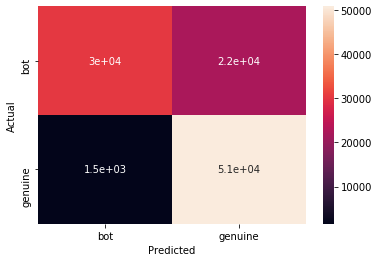

In [56]:
r_GaussianNB(url)


In [0]:
def CompareSupportedBayesModels(data_path):
  print('RESULTS FROM BERNOULLI MODEL')
  r_BernoulliNB(url)
  print('\n\nRESULTS FROM GAUSSIAN MODEL')
  r_GaussianNB(url)

RESULTS FROM BERNOULLI MODEL


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Predicted    bot  genuine
Actual                   
bot        42372    10211
genuine    19239    33178
Accuracy:  0.7195238095238096
/n/nRESULTS FROM GAUSSIAN MODEL


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Predicted    bot  genuine
Actual                   
bot        30297    22286
genuine     1539    50878
Accuracy:  0.7730952380952381


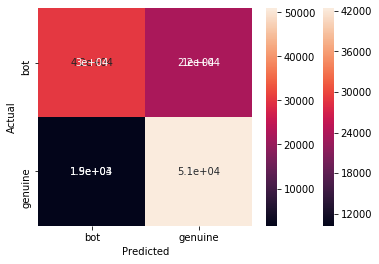

In [49]:
CompareSupportedBayesModels(url)